[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/main/tutorials/application-example/energy_hospital_load.ipynb)

## Building load forecasting: Hospital in SF

We can train a forecaster on another commom energy problem. In this, case we are training a 1-step ahead forecaster to predict the electricity consumption of a building.

The dataset contains one year of hourly observations.
The training will occur on 11 months of the data, reserving the last month for evaluation.

In [2]:
if "google.colab" in str(get_ipython()):
    # uninstall preinstalled packages from Colab to avoid conflicts
    !pip uninstall -y torch notebook notebook_shim tensorflow tensorflow-datasets prophet torchaudio torchdata torchtext torchvision
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes

import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

set_log_level("ERROR")

Found existing installation: torch 2.0.0
Uninstalling torch-2.0.0:
  Successfully uninstalled torch-2.0.0
  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-dlju__oi
  Running command git clone --filter=blob:none --quiet https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-dlju__oi
  Resolved https://github.com/ourownstory/neural_prophet.git to commit 7aac3beb54179389cb60e08263a0f309cabda917
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached torch-2.0.0-cp310-cp310-manylinux1_x86_64.whl (619.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.13 requires torchvision>=0.11, which is not installed.


In [1]:
!pip uninstall imgaug
!pip install imgaug==0.4.0

Found existing installation: imgaug 0.4.0
Uninstalling imgaug-0.4.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/imgaug-0.4.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/imgaug/*
Proceed (Y/n)? Y
  Successfully uninstalled imgaug-0.4.0
  Using cached imgaug-0.4.0-py2.py3-none-any.whl (948 kB)


In [3]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"


sf_load_df = pd.read_csv(data_location + "energy/SF_hospital_load.csv")
sf_load_df.head(3)

ds           y
0  2015-01-01 01:00:00  778.007969
1  2015-01-01 02:00:00  776.241750
2  2015-01-01 03:00:00  779.357338

### Generic forecast: Time-based features only
In this first section, we will train a model with time-features only like we would do with Facebook Prophet.

In [23]:
m = NeuralProphet(
    growth = 'off',
    n_forecasts = 6,
    n_lags=24,
    weekly_seasonality=6,
    daily_seasonality=10,
    trend_reg=1,
    learning_rate=0.01,
    quantiles = [0.05,0.95]

)
df_train, df_test = m.split_df(sf_load_df, freq="H", valid_p=1.0 / 12)

metrics = m.fit(df_train, freq="H", validation_df=df_test, progress="bar")

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [24]:
metrics.tail(1)

MAE_val   RMSE_val  Loss_val  RegLoss_val  epoch        MAE      RMSE  \
108  37.904663  51.652477    0.0161          0.0    108  32.052937  44.71619   

         Loss  RegLoss  
108  0.009341      0.0

In [25]:
metrics.tail(1)

MAE_val   RMSE_val  Loss_val  RegLoss_val  epoch        MAE      RMSE  \
108  37.904663  51.652477    0.0161          0.0    108  32.052937  44.71619   

         Loss  RegLoss  
108  0.009341      0.0

In [26]:
#import kaleido
forecast = m.predict(df_train)
forecast.tail(12)
#m.set_plotting_backend("plotly-static")
#m.plot(forecast)

Predicting: 125it [00:00, ?it/s]

ds            y        yhat1        yhat2        yhat3  \
8016 2015-12-01 01:00:00   792.373625   809.154236   807.826233   810.218872   
8017 2015-12-01 02:00:00   794.402390   798.570007   809.230591   808.773804   
8018 2015-12-01 03:00:00   793.091643   808.318298   812.200439   825.803894   
8019 2015-12-01 04:00:00   791.561956   809.516174   823.020691   827.687439   
8020 2015-12-01 05:00:00   882.847278   840.687622   859.260559   875.033203   
8021 2015-12-01 06:00:00   886.717090   917.018311   879.128906   899.792236   
8022 2015-12-01 07:00:00  1121.016441  1127.122314  1146.255615  1103.997559   
8023 2015-12-01 08:00:00  1232.865134  1167.550049  1183.794678  1208.366333   
8024 2015-12-01 09:00:00  1280.516541  1284.477661  1245.462646  1259.669922   
8025 2015-12-01 10:00:00  1319.989116  1323.271729  1329.031494  1278.138184   
8026 2015-12-01 11:00:00  1331.973260  1341.374512  1339.962646  1345.512085   
8027 2015-12-01 12:00:00  1328.260492  1322.249512  1336.975830  1336.878052   

            yhat4        yhat5        yhat6   yhat1 5.0%   yhat2 5.0%  ...  \
8016   801.900330   794.296204   786.514038   782.832581   783.792358  ...   
8017   810.811829   801.615845   797.450256   780.504089   787.292847  ...   
8018   825.254150   826.432312   821.274963   780.886658   782.943237  ...   
8019   839.734314   838.565613   839.300659   782.461609   781.427612  ...   
8020   879.741943   890.438232   890.419434   797.276245   823.847595  ...   
8021   914.118164   918.516235   924.784851   869.688721   823.124878  ...   
8022  1122.996948  1136.278076  1138.879883  1040.971558  1046.948853  ...   
8023  1171.549805  1189.890137  1197.788452  1082.800903  1104.194580  ...   
8024  1280.925903  1248.041748  1258.596802  1242.534180  1190.212036  ...   
8025  1291.737671  1310.271729  1292.051758  1271.427734  1285.515869  ...   
8026  1301.325806  1315.955444  1326.714844  1305.799927  1300.331299  ...   
8027  1341.210205  1304.788086  1313.396118  1283.243286  1303.354248  ...   

      yhat6 95.0%         ar1         ar2         ar3         ar4         ar5  \
8016   818.433960  -15.273105  -16.601084  -14.208441  -22.526985  -30.131088   
8017   810.433350  -16.804996   -6.144402   -6.601175   -4.563152  -13.759116   
8018   842.304260  -17.754341  -13.872214   -0.268716   -0.818443    0.359682   
8019   871.287170  -54.754383  -41.249855  -36.583099  -24.536205  -25.704947   
8020   892.727417  -57.564583  -38.991665  -23.218969  -18.510256   -7.814001   
8021   962.029968 -105.662392 -143.551865 -122.888512 -108.562584 -104.164490   
8022  1197.730713  -29.293705  -10.160401  -52.418407  -33.419003  -20.137810   
8023  1229.846436  -36.488113  -20.243481    4.328189  -32.488438  -14.148004   
8024  1284.619629   31.612160   -7.402930    6.804311   28.060383   -4.823866   
8025  1320.575439   54.607002   60.366718    9.473384   23.072903   41.607025   
8026  1335.700439   68.137840   66.725876   72.275330   28.089067   42.718742   
8027  1331.071899   61.391735   76.118134   76.020355   80.352386   43.930466   

            ar6       trend  season_weekly  season_daily  
8016 -37.913307  1012.21283      18.124643   -205.910172  
8017 -17.924711  1012.21283      15.169301   -212.007141  
8018  -4.797676  1012.21283      14.609157   -200.749374  
8019 -24.969851  1012.21283      16.387632   -164.329941  
8020  -7.832772  1012.21283      20.029369   -133.990021  
8021 -97.895874  1012.21283      25.946186    -15.478289  
8022 -17.536003  1012.21283      33.680401    110.522682  
8023  -6.249773  1012.21283      43.118774    148.706543  
8024   5.731222  1012.21283      53.247269    187.405441  
8025  23.387007  1012.21283      64.024307    192.427612  
8026  53.478188  1012.21283      74.259666    186.764221  
8027  52.538376  1012.21283      84.776436    163.868439  

[12 rows x 29 columns]

In [13]:
df_train

ds            y
0    2015-01-01 01:00:00   778.007969
1    2015-01-01 02:00:00   776.241750
2    2015-01-01 03:00:00   779.357338
3    2015-01-01 04:00:00   778.737196
4    2015-01-01 05:00:00   787.835835
...                  ...          ...
8025 2015-12-01 10:00:00  1319.989116
8026 2015-12-01 11:00:00  1331.973260
8027 2015-12-01 12:00:00  1328.260492
8028 2015-12-01 13:00:00  1280.650172
8029 2015-12-01 14:00:00  1312.071504

[8030 rows x 2 columns]

In [27]:
forecast = m.predict(df_test)

Predicting: 125it [00:00, ?it/s]

In [28]:
forecast

ds            y       yhat1       yhat2       yhat3  \
0   2015-11-30 13:00:00  1282.985310         NaN         NaN         NaN   
1   2015-11-30 14:00:00  1314.936178         NaN         NaN         NaN   
2   2015-11-30 15:00:00  1325.376786         NaN         NaN         NaN   
3   2015-11-30 16:00:00  1325.330106         NaN         NaN         NaN   
4   2015-11-30 17:00:00  1331.973362         NaN         NaN         NaN   
..                  ...          ...         ...         ...         ...   
751 2015-12-31 20:00:00   845.563081  850.135864  853.212952  850.650757   
752 2015-12-31 21:00:00   827.530521  777.991211  775.075073  775.634399   
753 2015-12-31 22:00:00   829.256300  803.520691  784.587036  783.825134   
754 2015-12-31 23:00:00   813.937205  817.133545  803.729980  772.931519   
755 2016-01-01 00:00:00   815.588584  830.864563  828.335327  808.940918   

          yhat4       yhat5       yhat6  yhat1 5.0%  yhat2 5.0%  ...  \
0           NaN         NaN         NaN         NaN         NaN  ...   
1           NaN         NaN         NaN         NaN         NaN  ...   
2           NaN         NaN         NaN         NaN         NaN  ...   
3           NaN         NaN         NaN         NaN         NaN  ...   
4           NaN         NaN         NaN         NaN         NaN  ...   
..          ...         ...         ...         ...         ...  ...   
751  856.894653  860.549133  847.525635  824.164185  829.973572  ...   
752  773.194824  779.230408  781.055969  749.105225  753.935547  ...   
753  784.184875  782.674927  786.006714  757.246765  744.628601  ...   
754  771.517151  772.770752  771.968933  769.354004  762.441467  ...   
755  782.591614  779.823120  780.541931  793.859741  793.812561  ...   

     yhat6 95.0%        ar1        ar2        ar3         ar4         ar5  \
0            NaN        NaN        NaN        NaN         NaN         NaN   
1            NaN        NaN        NaN        NaN         NaN         NaN   
2            NaN        NaN        NaN        NaN         NaN         NaN   
3            NaN        NaN        NaN        NaN         NaN         NaN   
4            NaN        NaN        NaN        NaN         NaN         NaN   
..           ...        ...        ...        ...         ...         ...   
751   873.958923  93.531235  96.608307  94.046120  100.290024  103.944511   
752   799.949280  55.154949  52.238796  52.798100   50.358570   56.394150   
753   809.991394  80.618263  61.684635  60.922710   61.282475   59.772503   
754   801.575745  80.986061  67.582520  36.784042   35.369678   36.623245   
755   802.714905  71.602257  69.073021  49.678638   23.329317   20.560793   

           ar6       trend  season_weekly  season_daily  
0          NaN         NaN            NaN           NaN  
1          NaN         NaN            NaN           NaN  
2          NaN         NaN            NaN           NaN  
3          NaN         NaN            NaN           NaN  
4          NaN         NaN            NaN           NaN  
..         ...         ...            ...           ...  
751  90.920959  1012.21283    -163.267853    -92.340347  
752  58.219704  1012.21283    -134.484436   -154.892120  
753  63.104305  1012.21283    -104.167175   -185.143250  
754  35.821453  1012.21283     -74.117195   -201.948166  
755  21.279640  1012.21283     -45.633358   -207.317169  

[756 rows x 29 columns]

In [9]:
!pip install -U kaleido

In [8]:
!pip uninstall imgaug
!pip install imgaug==0.4.0

Found existing installation: imgaug 0.4.0
Uninstalling imgaug-0.4.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/imgaug-0.4.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/imgaug/*
Proceed (Y/n)? Y
  Successfully uninstalled imgaug-0.4.0
  Using cached imgaug-0.4.0-py2.py3-none-any.whl (948 kB)


Predicting: 251it [00:00, ?it/s]

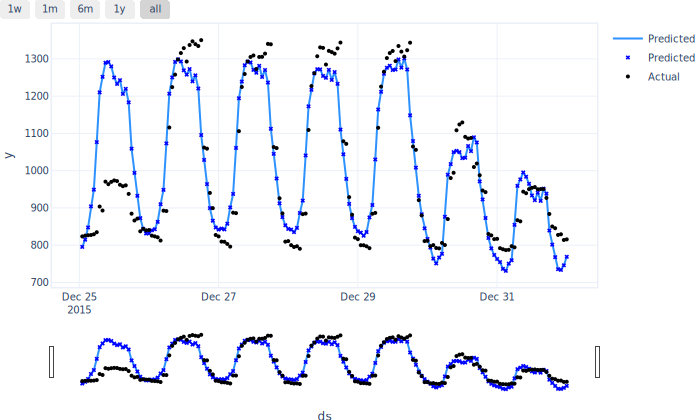

In [ ]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
m.plot(forecast[-7 * 24 :])

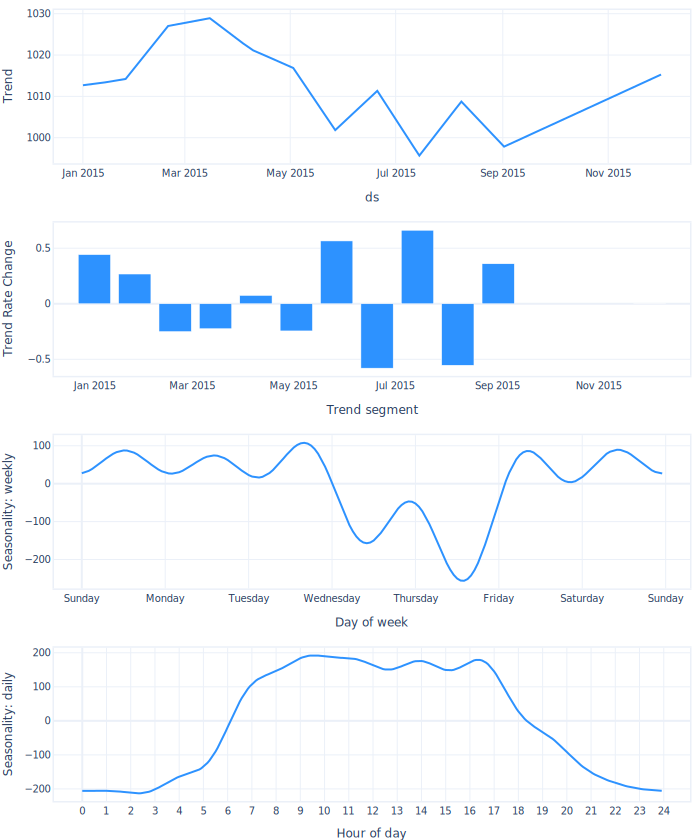

In [ ]:
m.plot_parameters()

### 1-step ahead forecast with Auto-Regression

In [ ]:
m = NeuralProphet(
    growth="off",
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3 * 24,
    ar_reg=1,
    learning_rate=0.01,
)
df_train, df_test = m.split_df(sf_load_df, freq="H", valid_p=1.0 / 12)

metrics = m.fit(df_train, freq="H", validation_df=df_test, progress="bar")

In [ ]:
metrics.tail(1)

MAE_val   RMSE_val  Loss_val  RegLoss_val  epoch        MAE       RMSE  \
108  24.246571  37.293633  0.002822     0.000877    108  23.822706  35.911766   

         Loss   RegLoss  
108  0.002339  0.000877

In [ ]:
forecast = m.predict(df_train)
m.set_plotting_backend("plotly-static")
m.plot(forecast)

Predicting: 249it [00:00, ?it/s]

Predicting: 249it [00:00, ?it/s]

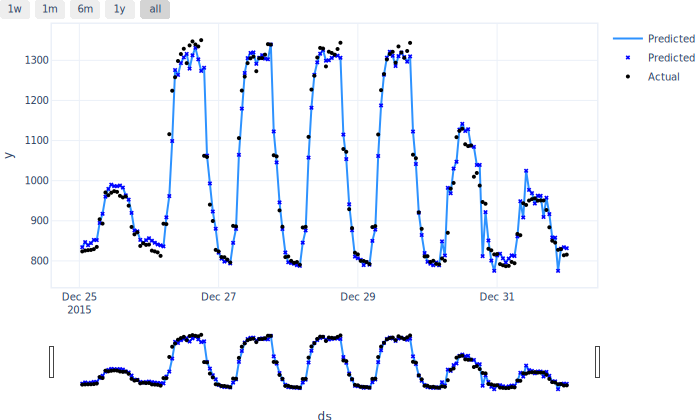

In [ ]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
m.plot(forecast[-7 * 24 :])

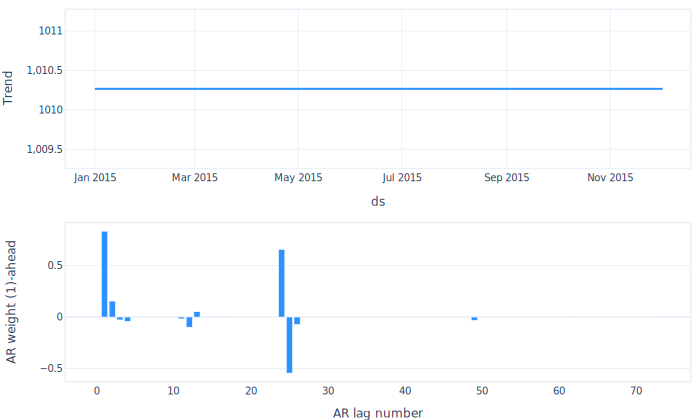

In [ ]:
m.plot_parameters()

### 1 step ahead forecast with AR-Net: Using a Neural Network
Here, we will use the power of a neural Network to fit non-linear patterns.

In [ ]:
m = NeuralProphet(
    growth="off",
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3 * 24,
    ar_layers=[32, 32, 32, 32],
    learning_rate=0.003,
)
df_train, df_test = m.split_df(sf_load_df, freq="H", valid_p=1.0 / 12)

metrics = m.fit(df_train, freq="H", validation_df=df_test, progress="bar")

In [ ]:
metrics.tail(1)

MAE_val   RMSE_val  Loss_val  RegLoss_val  epoch       MAE      RMSE  \
108  7.14312  10.696775   0.00016          0.0    108  6.197587  9.060362   

         Loss  RegLoss  
108  0.000093      0.0

In [ ]:
forecast = m.predict(df_train)
m.set_plotting_backend("plotly-static")
m.plot(forecast)

Predicting: 249it [00:00, ?it/s]

Predicting: 249it [00:00, ?it/s]

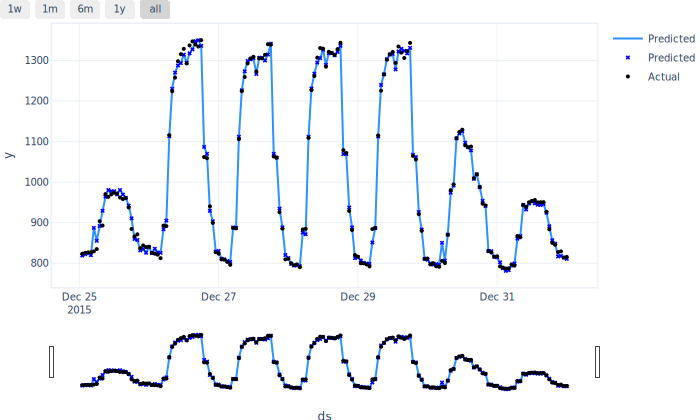

In [ ]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
m.plot(forecast[-7 * 24 :])

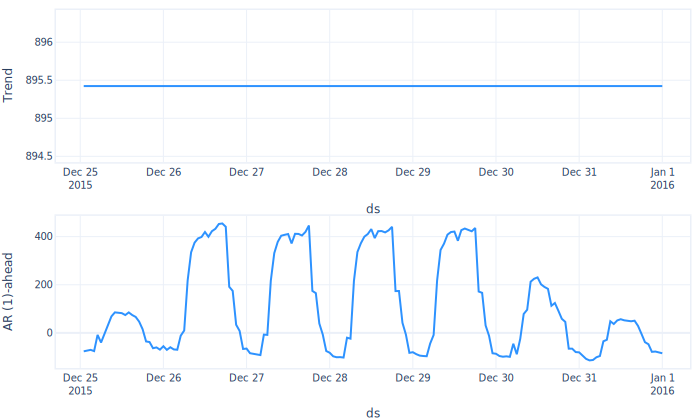

In [ ]:
m.plot_components(forecast[-7 * 24 :])